# AC Simulation Example

In this example, we run a **AC** simulation of an ideal LDO model.

This is the same code saved in the **20_AC.py**, with more interactive descriptions.

## 1. Run a Simulation

After running below block of code, we have the simulation result in a Pandas DataFrame **df**.

In [7]:
from PyQSPICE import clsQSPICE as pqs

import re
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

fname = "VRM_GainBW"

run = pqs(fname)

run.qsch2cir()
run.cir2qraw()

run.setNline(199)

df = run.LoadQRAW(["V(vout)"])

# Calculate "gain" from the complex result data
def CalcGain(row):
    row["gain"] = 20*math.log10(abs(row["V(vout)"]))
    return row
df = df.apply(CalcGain, axis=1)

# Bring back some data "real"
run.comp2real(df, ["Step", "gain", run.sim['Xlbl']])

print(df)

             Freq                       V(vout)  Step        gain
0    1.000000e+00  911837.335958- 11388.964345j   0.0  119.199025
1    1.096986e+00  911798.215591- 12736.912744j   0.0  119.198822
2    1.203378e+00  911752.322222- 14195.455127j   0.0  119.198590
3    1.320088e+00  911698.242840- 15776.598004j   0.0  119.198323
4    1.448118e+00  911634.327084- 17493.466022j   0.0  119.198012
..            ...                           ...   ...         ...
395  6.905514e+07      -0.000091-     0.009586j   1.0  -40.367113
396  7.575250e+07      -0.000076-     0.008746j   1.0  -41.163222
397  8.309942e+07      -0.000063-     0.007972j   1.0  -41.968396
398  9.115888e+07      -0.000052-     0.007259j   1.0  -42.782042
399  1.000000e+08      -0.000043-     0.006604j   1.0  -43.603625

[400 rows x 4 columns]


Note that the gain calculation of "df = df.apply()" makes everything "complex".  So we re-convert known "non-complex" data to "real".

## 2. Small Preparation for Plotting

In [8]:
#######
# Plot Default

mpl.rcParams.update([['font.sans-serif', ["Arial Rounded MT Bold", 'Arial Unicode MS', 'Arial', 'sans-serif']], ["mathtext.default", "rm"], ["legend.labelspacing", 0.1], ["legend.columnspacing", 0.2], ["legend.handletextpad", 0.3], ['axes.formatter.useoffset', False], ['xtick.minor.visible', True], ['ytick.minor.visible', True], ['grid.linewidth', 1],["savefig.dpi", 300], ["axes.unicode_minus", False]])

#######
# Plotting Pandas, AC

plt.close('all')
plt.style.use('ggplot')

## 3. Plotting

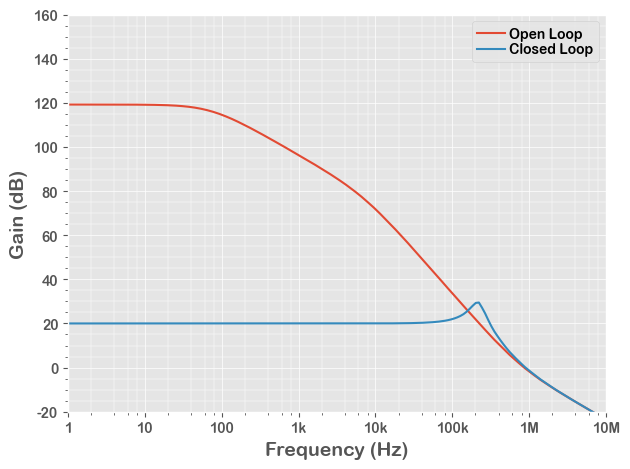

In [9]:
# Prepare a blank plotting area
fig, ax = plt.subplots(tight_layout=True)

# Plot AC curves of all ".STEP" (we know only 2 steps)
df[df.Step == 0].plot(ax=ax, x="Freq",  y="gain", label="Open Loop")
df[df.Step == 1].plot(ax=ax, x="Freq",  y="gain", label="Closed Loop")

# Axis setup = begin =
ax.set_xscale('log')
ax.set_xlim(1,10e6)
ax.set_ylim(-20,160)
ax.set_xticks([1,1e1,1e2,1e3,1e4,1e5,1e6,1e7],["1","10","100","1k","10k","100k","1M","10M"])
ax.set_ylabel('Gain (dB)', fontsize=14)
ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.minorticks_on()
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(numticks=13))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(numticks=13, subs=(.2,.4,.6,.8)))

ax.grid(which='major', linewidth="0.5")
ax.grid(which='minor', linewidth="0.35")
# Axis setup = end =

# Legent
plt.legend(ncol=1, loc="upper right",fancybox=True)

# Save the Plot in PNG file
plt.savefig(run.path['base'] + "_plt.png", format='png', bbox_inches='tight')
plt.show()

plt.close('all')